# Bézier Curves

- Bézier curves are smooth curves defined using **control points**.
- A degree $ n $ Bézier curve is defined by $ n + 1 $ control points $ P_i $.

$$
C(t) = \sum_{i=0}^n b_{i,n}(t) P_i
$$
where

$$
b_{i,n}(t) = \binom{n}{i} t^i (1-t)^{n-i}
$$

For example, for a cubic Bézier:

$$
C(t) = (1-t)^3 P_0 + 3t(1-t)^2 P_1 + 3t^2(1-t) P_2 + t^3 P_3
$$

### Expanding Out the Coefficients

Expanding out the coefficients of $ P_i $ gives:

$$
C(t) = (-t^3 + 3t^2 - 3t + 1)P_0 + (3t^3 - 6t^2 + 3t)P_1 + (-3t^3 + 3t^2)P_2 + t^3 P_3
$$
which can be written as the matrix equation:

$$
C(t) = 
\begin{pmatrix}
P_0 & P_1 & P_2 & P_3
\end{pmatrix}
\begin{pmatrix}
-1 &  3 & -3 &  1 \\
 3 & -6 &  3 &  0 \\
-3 &  3 &  0 &  0 \\
 1 &  0 &  0 &  0 
\end{pmatrix}
\begin{pmatrix}
t^3 \\
t^2 \\
t \\
1
\end{pmatrix}
$$

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from math import comb

In [2]:
control_points = np.array([
    [0, 0],  # P0
    [1, 2],  # P1
    [3, 3],  # P2
    [4, 0]   # P3
])

# Define the Bézier matrix
bezier_matrix = np.array([
    [-1,  3, -3,  1],
    [ 3, -6,  3,  0],
    [-3,  3,  0,  0],
    [ 1,  0,  0,  0]
])

# Generate a range of t values
t_values = np.linspace(0, 1, 100)
T = np.vstack([t_values**3, t_values**2, t_values, np.ones_like(t_values)])

# Compute the Bézier curve points
curve_points = control_points.T @ bezier_matrix @ T

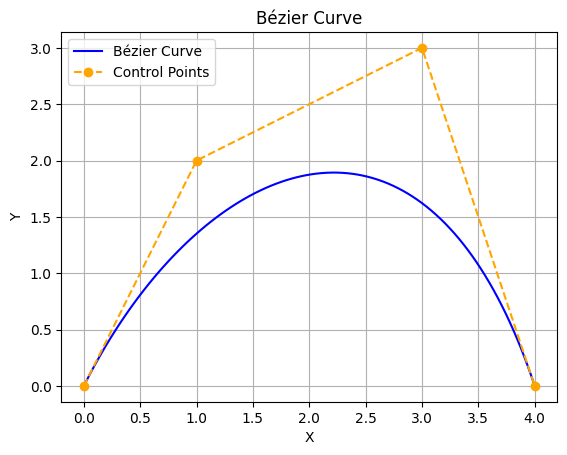

In [ ]:
plt.plot(curve_points[0, :], curve_points[1, :], label='Bézier Curve', color='blue')

control_x, control_y = control_points[:, 0], control_points[:, 1]
plt.plot(control_x, control_y, '--o', label='Control Points', color='orange')

plt.title('Bézier Curve')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid()
plt.axis('equal')
plt.show()

In [8]:
def bezier_curve(control_points, t_values):
    n = len(control_points) - 1  # Degree of the Bézier curve
    curve_points = np.zeros((len(t_values), control_points.shape[1]))
    for i in range(len(control_points)):
        binomial_coeff = comb(n, i)  # Binomial coefficient
        bernstein_poly = binomial_coeff * (t_values**i) * ((1 - t_values)**(n - i))
        curve_points += np.outer(bernstein_poly, control_points[i])
    return curve_points

In [9]:
# Define t values
t_values = np.linspace(0, 1, 100)

# Example 1: Bézier curve with 2 control points (Linear)
control_points_2 = np.array([[0, 0], [4, 4]])
curve_2 = bezier_curve(control_points_2, t_values)

# Example 2: Bézier curve with 3 control points (Quadratic)
control_points_3 = np.array([[0, 0], [2, 4], [4, 0]])
curve_3 = bezier_curve(control_points_3, t_values)

# Example 3: Bézier curve with 4 control points (Cubic)
control_points_4 = np.array([[0, 0], [1, 3], [3, 3], [4, 0]])
curve_4 = bezier_curve(control_points_4, t_values)

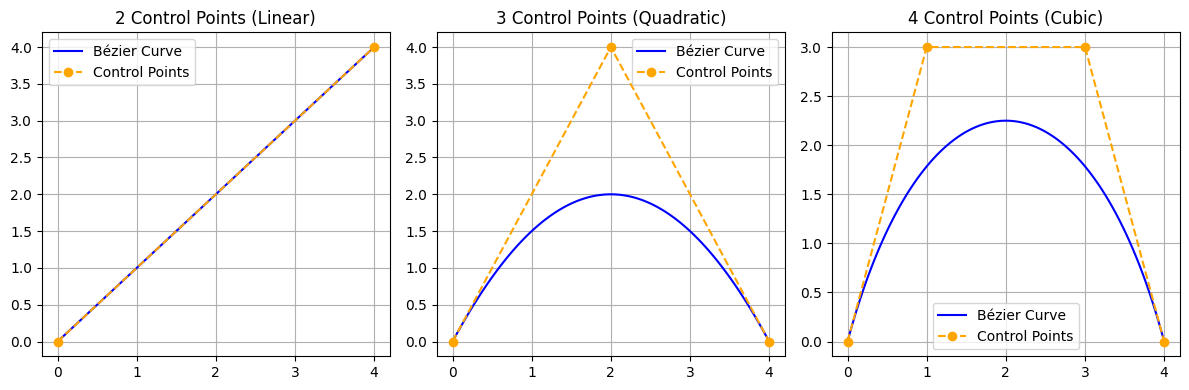

In [10]:
# Plotting
plt.figure(figsize=(12, 4))

# Plot for 2 control points
plt.subplot(1, 3, 1)
plt.plot(curve_2[:, 0], curve_2[:, 1], label="Bézier Curve", color="blue")
plt.plot(control_points_2[:, 0], control_points_2[:, 1], '--o', label="Control Points", color="orange")
plt.title("2 Control Points (Linear)")
plt.legend()
plt.grid()

# Plot for 3 control points
plt.subplot(1, 3, 2)
plt.plot(curve_3[:, 0], curve_3[:, 1], label="Bézier Curve", color="blue")
plt.plot(control_points_3[:, 0], control_points_3[:, 1], '--o', label="Control Points", color="orange")
plt.title("3 Control Points (Quadratic)")
plt.legend()
plt.grid()

# Plot for 4 control points
plt.subplot(1, 3, 3)
plt.plot(curve_4[:, 0], curve_4[:, 1], label="Bézier Curve", color="blue")
plt.plot(control_points_4[:, 0], control_points_4[:, 1], '--o', label="Control Points", color="orange")
plt.title("4 Control Points (Cubic)")
plt.legend()
plt.grid()

# Show all plots
plt.tight_layout()
plt.show()

$$
C(t) = (1-t) P_0 + t P_1
$$

$$
C(t) = (1-t)^2 P_0 + 2t(1-t) P_1 + t^2 P_2
$$

$$
C(t) = (1-t)^3 P_0 + 3t(1-t)^2 P_1 + 3t^2(1-t) P_2 + t^3 P_3
$$